In [1]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, deprocess_image, preprocess_image
import torch
from torchvision import datasets,transforms
from torch import optim,nn
from torchvision.models import resnet18, densenet161
import os
import cv2
import numpy as np
import PIL
import matplotlib.pyplot as plt
# import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
root = os.getcwd()
data_dir = root+ "/data" # change PATH here
# data_dir = "/Users/zhiiikaiii/Desktop/test_data/train"

In [3]:
# model = densenet161(pretrained=True) # load pth file torch.load()
# model = torch.load("/Users/zhiiikaiii/Desktop/epoch-29.pth", map_location=torch.device('cpu'))
model_ft = densenet161(pretrained=True)
# #  Freezing pretrained layers, so backpropogation doesn't occur during training.
# for param in model_ft.parameters():
#     param.requires_grad = False
model_ft.classifier = nn.Sequential(nn.Linear(2208, 2208),
                            nn.ReLU(inplace=True),
                            nn.Dropout(0.1),
                            nn.Linear(2208, 1024),
                            nn.ReLU(inplace=True),
                            nn.Dropout(0.1),
                            nn.Linear(1024, 2),
                            nn.LogSoftmax(dim=1))
# model_ft.load_state_dict(torch.load("/Users/zhiiikaiii/Desktop/epoch-29.pth", map_location=torch.device('cpu')))
model_ft.load_state_dict(torch.load(root + "/models/epoch-12.pth", map_location=torch.device('cpu')))
# model.eval()

<All keys matched successfully>

In [4]:
target_layer = model_ft.features[-1]

test_transforms = transforms.Compose([transforms.Resize(224),
                                        transforms.ToTensor(),
                                        ])
data = datasets.ImageFolder(data_dir, transform=test_transforms)
to_pil = transforms.ToPILImage()
loader = torch.utils.data.DataLoader(data, batch_size=1)
dataiter = iter(loader)
images, labels = dataiter.next()

In [5]:
# image = to_pil(images[0])
# image_tensor = test_transforms(image).float()
# image_tensor = image_tensor.unsqueeze_(0)

# input_tensor = image_tensor

In [6]:
!pip freeze

# 

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.7.2
anaconda-navigator==2.0.4
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1610472525955/work
anyio @ file:///opt/concourse/worker/volumes/live/64740ac7-3a9c-4fbb-6685-a51c4ff8b4ca/volume/anyio_1617783319350/work/dist
appdirs==1.4.4
applaunchservices==0.2.1
appnope @ file:///opt/concourse/worker/volumes/live/5f13e5b3-5355-4541-5fc3-f08850c73cf9/volume/appnope_1606859448618/work
appscript @ file:///opt/concourse/worker/volumes/live/82e8b4c7-2416-4d10-509e-144ca79d9b1d/volume/appscript_1611426996703/work
argh==0.26.2
argon2-cffi @ file:///opt/concourse/worker/volumes/live/d733ceb5-7f19-407b-7da7-a386540ab855/volume/argon2-cffi_1613037492998/work
asgiref==3.4.1
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///opt/concourse/worker/volumes/live/343a8902-287c-47fb-6db8-923a63364302/volume/astroid_1613500849157/work
astropy @ file:///opt/concourse/wor

In [7]:
rgb_img = cv2.imread(data_dir +"/MSS_JPEG/MSS_0.jpg", 1)[:, :, ::-1]
rgb_img = cv2.resize(rgb_img, (224, 224))
rgb_img = np.float32(rgb_img) / 255
input_tensor = preprocess_image(rgb_img, mean=[0.5, 0.5, 0.5],
                                std=[0.5, 0.5, 0.5])

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


(-0.5, 223.5, 223.5, -0.5)

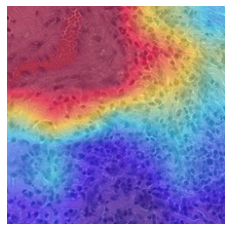

In [8]:
cam = EigenCAM(model=model_ft, target_layer=target_layer)

# If target_category is None, the highest scoring category
# will be used for every image in the batch.
# target_category can also be an integer, or a list of different integers
# for every image in the batch.
target_category = None

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)

# grayscale_cam has only one image in the batch
grayscale_cam = grayscale_cam[0, :]

visualization = show_cam_on_image(rgb_img, grayscale_cam)
visualization.shape
plt.imshow(visualization)
plt.axis('off')

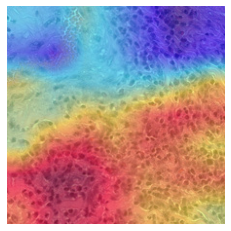

In [9]:
cam = GradCAM(model=model_ft, target_layer=target_layer)

# If target_category is None, the highest scoring category
# will be used for every image in the batch.
# target_category can also be an integer, or a list of different integers
# for every image in the batch.
target_category = 1

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam)
visualization.shape
plt.axis('off')
plt.imshow(visualization)